In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

pd.set_option('mode.chained_assignment',  None)

In [3]:
voice_data = pd.read_csv('1and2.csv', encoding='cp949') # 1and2.csv 파일을 읽어온다.

In [4]:
voice_data

,f1,f2,Unnamed: 2
0,1.0,'여보세요 여보세요 아 예 일단은 상한기간 5년 연이율은 7.8% 이세요 그리고 한...,NaN
1,1.0,그리고 공증 비용 50만 2000원이시구요 공증 비용은 세달동안 연체 안했을시에 환...,NaN
2,1.0,지금은 안되는데,NaN
3,1.0,언제쯤 하실 것 같아요,NaN
4,1.0,먼저 내고 받는거에요?,NaN
...,...,...,...
3916,0.0,그래서 할인도 많이 받고 더 낫더라,NaN
3917,0.0,대용량으로 사서 오래 오래 두고 먹어야겠다,NaN
3918,0.0,응 그래 내가 사보고 괜찮으면 알려줄게,NaN
3919,0.0,진짜 라면 없인 못살아요 내 뽀글이,NaN


In [6]:
print('총 샘플의 수 :',len(voice_data))  # 0번부터 3920까지 총 3921개

총 샘플의 수 : 3921


In [7]:
del voice_data['Unnamed: 2'] # Feature 중 필요없는 부분 Unnamed:2 Feature를 delete

In [9]:
voice_data[0:5] # f1과 f2만 남은걸 볼 수 있음

,f1,f2
0,1.0,'여보세요 여보세요 아 예 일단은 상한기간 5년 연이율은 7.8% 이세요 그리고 한...
1,1.0,그리고 공증 비용 50만 2000원이시구요 공증 비용은 세달동안 연체 안했을시에 환...
2,1.0,지금은 안되는데
3,1.0,언제쯤 하실 것 같아요
4,1.0,먼저 내고 받는거에요?


In [10]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      3920 non-null   float64
 1   f2      3920 non-null   object 
dtypes: float64(1), object(1)
memory usage: 61.4+ KB


In [12]:
print('결측값 여부 :',voice_data.isnull().values.any())

결측값 여부 : True


In [13]:
voice_data = voice_data.dropna() # 결측치제거
print('결측값 여부 :',voice_data.isnull().values.any())

결측값 여부 : False


In [14]:
print('f2열의 유니크한 값 :',voice_data['f2'].nunique()) # 중복값이 240개가 있었음 

f2열의 유니크한 값 : 3680


In [16]:
voice_data.drop_duplicates(subset=['f2'], inplace=True) # 중복행 제거
print('총 샘플의 수 :',len(voice_data))

총 샘플의 수 : 3680


In [17]:
voice_data.astype({"f1" : np.int64}) # f1 feature의 value를 float에서 int로 바꿈

,f1,f2
0,1,'여보세요 여보세요 아 예 일단은 상한기간 5년 연이율은 7.8% 이세요 그리고 한...
1,1,그리고 공증 비용 50만 2000원이시구요 공증 비용은 세달동안 연체 안했을시에 환...
2,1,지금은 안되는데
3,1,언제쯤 하실 것 같아요
4,1,먼저 내고 받는거에요?
...,...,...
3914,0,진짜 조금이라도 저렴하게 사 먹게
3916,0,그래서 할인도 많이 받고 더 낫더라
3917,0,대용량으로 사서 오래 오래 두고 먹어야겠다
3918,0,응 그래 내가 사보고 괜찮으면 알려줄게


<AxesSubplot:>

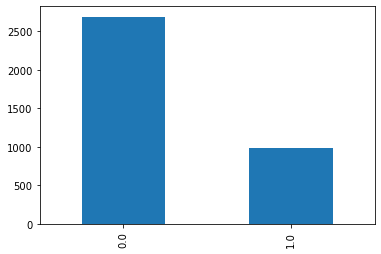

In [19]:
voice_data['f1'].value_counts().plot(kind='bar') # 비율 확인 (현재 1차 학습의 데이터 현황기록)

In [20]:
print('보이스피싱 corpus와 일상어 corpus의 개수') #(현재 1차 학습의 데이터 현황기록)
print(voice_data.groupby('f1').size().reset_index(name='count'))


보이스피싱 corpus와 일상어 corpus의 개수
    f1  count
0  0.0   2691
1  1.0    989


In [23]:
#(현재 1차 학습의 데이터 현황기록)
print(f'보이스피싱의 비율 = {round(voice_data["f1"].value_counts()[0]/len(voice_data) * 100,3)}%')
print(f'일상어의 비율 = {round(voice_data["f1"].value_counts()[1]/len(voice_data) * 100,3)}%')

보이스피싱의 비율 = 73.125%
일상어의 비율 = 26.875%


In [24]:
# X_data에는 본문을 넣고 Y_data는 정답값을 넣고 다 들어갔나 확인
X_data = voice_data['f2']
y_data = voice_data['f1']
print('본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

본문의 개수: 3680
레이블의 개수: 3680


In [25]:
# from sklearn.model_selection 라이브러리에서 train_test_split이라는 함수 사용하여 학습과 테스트데이터셋 8:2로 나누고
# random_state에 고정값 0(임의의수 가능) 을 넣어 같은 학습/테스트 데이터셋을 생성하기 위한 수를 넣었음
# random_state에 값을 넣지 않을시 실행할때마다 무작위로 분리되어 결과값이 달라짐
# stratify=y_data Stratified 기반 분할, train 데이터의 20%를 평가 데이터 셋으로 사용. (80% 데이터 학습에 사용)
# stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해줌
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)
print('--------훈련 데이터의 비율-----------')
print(f'정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 메일 = 73.132%
스팸 메일 = 26.868%


In [45]:
format(len(y_train))# y_train f1, 즉 본문의 데이터중 train셋에 들어간 데이터 (80%)

'2944'

In [53]:
format(len(y_test))# y_train f1, 즉 본문의 데이터중 test셋에 들어간 데이터 (200%)

'736'

In [46]:
y_train.value_counts() # y_train의 value가 전체 훈련데이터의 비율(73%,26%)을 따라간것을 알 수 있음 (stratify=y_data)

0.0    2153
1.0     791
Name: f1, dtype: int64

In [52]:
y_test.value_counts()

0.0    538
1.0    198
Name: f1, dtype: int64

In [29]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 메일 = 73.098%
스팸 메일 = 26.902%


In [30]:
tokenizer = Tokenizer() # tokenizer 객체생성
tokenizer.fit_on_texts(X_train) # 단어 인덱스를 구축 (문자 데이터를 받아 리스트로 변환)
X_train_encoded = tokenizer.texts_to_sequences(X_train) #문자열을 정수 인덱스의 리스트로 변환


In [32]:
print(X_train_encoded[:5]) # encoding된 X_train의 5번째까지의 리스트를 출력

[[869, 1332, 91, 3, 186, 2513], [2514], [73, 14, 636, 2515, 222, 2516], [11, 53, 2517, 153, 870], [871, 247, 505, 70, 2518, 2519, 102, 2520, 2521, 31, 872, 1333, 172, 223, 63, 1334, 64, 2522]]


In [33]:
X_train.head() # 2502 부터 X_train 데이터의 1번임 위에 매핑이 되는것을 알 수 있음

2502                                   크게 해줘야 되는 거 아냐? 부담
2945                                                 명의여!
3281                            오 이제 오복이 안부는 거기서 확인해야겠다  
2181                                   나는 바로  옆동네인 줄 알았어!
812       쉽게 말씀 드리면 하나 카드에서 카드론으로 해서 백만원이 됐든 이 백만원 삼백만...
Name: f2, dtype: object

In [34]:
word_to_index = tokenizer.word_index # 계산된 단어 인덱스를 구함 word_index 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환

{'진짜': 1, '아': 2, '거': 3, '지금': 4, '그': 5, '안': 6, '고객님': 7, '나': 8, '근데': 9, '네': 10, '나는': 11, '제가': 12, '좀': 13, '이제': 14, '어': 15, '뭐': 16, '저희가': 17, '나도': 18, '맞아': 19, '그러면': 20, '저희': 21, '다': 22, '그래서': 23, '해': 24, '그거': 25, '있어': 26, '한': 27, '때문에': 28, '와': 29, '수': 30, '이': 31, '그럼': 32, '잘': 33, '너무': 34, '같아': 35, '많이': 36, '그냥': 37, '왜': 38, '헐': 39, '때': 40, '그리고': 41, '그런': 42, '한번': 43, '있는': 44, '거야': 45, '일단': 46, '고객님께서': 47, '혹시': 48, '어떤': 49, '본인': 50, '또': 51, '하는': 52, '바로': 53, '엄청': 54, '아니': 55, '더': 56, '언니': 57, '하고': 58, '게': 59, '응': 60, '어떻게': 61, '웅': 62, '오늘': 63, '거예요': 64, '못': 65, '이렇게': 66, '그렇게': 67, '할': 68, '내가': 69, '하나': 70, '대출': 71, '전화': 72, '오': 73, '봐': 74, '대박': 75, '무슨': 76, '가서': 77, '난': 78, '언니는': 79, '너': 80, '같이': 81, '알아': 82, '내': 83, '그게': 84, '우리': 85, '아니야': 86, '은행': 87, '예': 88, '좋아': 89, '전에': 90, '되는': 91, '하면': 92, '다른': 93, '몇': 94, '그래': 95, '좋아해': 96, '요즘에': 97, '정도': 98, '같은': 99, '제일': 100, '받고': 101, '해서': 102, '

In [35]:
threshold = 2        # 2-1 = 1 즉 1번만 등장하는 단어들을 제거하기 위한 threshold 값 선정
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 6207
단어 집합(vocabulary)에서 희귀 단어의 비율: 71.18935657758917
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 28.939761283103323


In [56]:
total_cnt

8719

## 훈련데이터에서 희귀단어 등장 빈도 비율이 28%이므로 높음
- 데이터셋을 더 다양화 시키고 양을 늘려 해결해야함
- 일단 이 코드에서는 제외 시키진 않았음

In [36]:
vocab_size = len(word_to_index) + 1 # 패딩을 위한 토큰인 0번 단어를 고려하며 +1을 해서 저장합니다.
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8720


문장의 최대 길이 : 270
문장의 평균 길이 : 7.285326


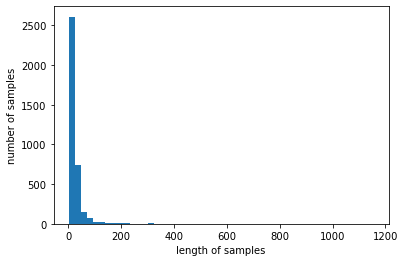

In [37]:
print('문장의 최대 길이 : %d' % max(len(l) for l in X_train_encoded))
print('문장의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

plt.show()

In [38]:
max_len = 270
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", X_train_padded.shape)

훈련 데이터의 크기(shape):  (2944, 270)


# RNN으로 보이스 피싱 탐지

In [39]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [40]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
37/37 [==============================] - 4s 56ms/step - loss: 0.5312 - acc: 0.7588 - val_loss: 0.4702 - val_acc: 0.7997
Epoch 2/10
37/37 [==============================] - 2s 46ms/step - loss: 0.4046 - acc: 0.8378 - val_loss: 0.3938 - val_acc: 0.8251
Epoch 3/10
37/37 [==============================] - 2s 52ms/step - loss: 0.2849 - acc: 0.8909 - val_loss: 0.3070 - val_acc: 0.8761
Epoch 4/10
37/37 [==============================] - 2s 47ms/step - loss: 0.2769 - acc: 0.8807 - val_loss: 0.4661 - val_acc: 0.7538
Epoch 5/10
37/37 [==============================] - 2s 46ms/step - loss: 0.2290 - acc: 0.9057 - val_loss: 0.2572 - val_acc: 0.8862
Epoch 6/10
37/37 [==============================] - 2s 46ms/step - loss: 0.1115 - acc: 0.9660 - val_loss: 0.2237 - val_acc: 0.9134
Epoch 7/10
37/37 [==============================] - 2s 46ms/step - loss: 0.0835 - acc: 0.9715 - val_loss: 0.2157 - val_acc: 0.9032
Epoch 8/10
37/37 [==============================] - 2s 45ms/step - loss: 0.0627 - a

In [41]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)

In [42]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

23/23 [==============================] - 0s 13ms/step - loss: 0.1937 - acc: 0.9212

 테스트 정확도: 0.9212


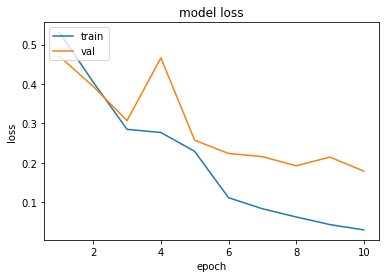

In [43]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()